<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [3]:
excel = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')
excel.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
c_info = pd.read_excel(excel, 'CLIENT_INFO')
l_hist = pd.read_excel(excel, 'LOAN_HISTORY')
m_hist = pd.read_excel(excel, 'MARKETING HISTORY')
s_hist = pd.read_excel(excel, 'SUBSCRIPTION HISTORY')

In [5]:
print(c_info.head())
print(l_hist.head())
print(m_hist.head())
print(s_hist.head())

     ID  AGE           JOB  MARITAL  EDUCATION
0  2836   58    management  married   tertiary
1  2837   44    technician   single  secondary
2  2838   33  entrepreneur  married  secondary
3  2839   47   blue-collar  married    unknown
4  2840   33       unknown   single    unknown
     ID DEFAULT  BALANCE HOUSING LOAN
0  2836      no     2143     yes   no
1  2837      no       29     yes   no
2  2838      no        2     yes  yes
3  2839      no     1506     yes   no
4  2840      no        1      no   no
     ID  CONTACT  DAY MONTH  DURATION  CAMPAIGN  PDAYS  PREVIOUS POUTCOME
0  2836  unknown    5   may       261         1     -1         0  unknown
1  2837  unknown    5   may       151         1     -1         0  unknown
2  2838  unknown    5   may        76         1     -1         0  unknown
3  2839  unknown    5   may        92         1     -1         0  unknown
4  2840  unknown    5   may       198         1     -1         0  unknown
     ID TERM_DEPOSIT
0  2836           no
1  2

In [6]:
df = pd.merge(c_info, l_hist, on=['ID'])
df = pd.merge(df, m_hist, on=['ID'])
df = pd.merge(df, s_hist, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            45211 non-null  int64 
 1   AGE           45211 non-null  int64 
 2   JOB           45211 non-null  object
 3   MARITAL       45211 non-null  object
 4   EDUCATION     45211 non-null  object
 5   DEFAULT       45211 non-null  object
 6   BALANCE       45211 non-null  int64 
 7   HOUSING       45211 non-null  object
 8   LOAN          45211 non-null  object
 9   CONTACT       45211 non-null  object
 10  DAY           45211 non-null  int64 
 11  MONTH         45211 non-null  object
 12  DURATION      45211 non-null  int64 
 13  CAMPAIGN      45211 non-null  int64 
 14  PDAYS         45211 non-null  int64 
 15  PREVIOUS      45211 non-null  int64 
 16  POUTCOME      45211 non-null  object
 17  TERM_DEPOSIT  45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


,ID,AGE,BALANCE,DAY,DURATION,CAMPAIGN,PDAYS,PREVIOUS
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,25441.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,2836.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,14138.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,25441.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,36743.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,48046.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df = df.drop(['ID'], axis=1)
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Task 4: Data Prep & Start H2O

In [9]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphya_btm1
  JVM stdout: /tmp/tmphya_btm1/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmphya_btm1/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,3 months and 2 days
H2O_cluster_name:,H2O_from_python_rhyme_f9fro0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [10]:
h2o_df = h2o.H2OFrame(df)
h2o_df.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [12]:
train, test = h2o_df.split_frame(ratios = [0.75])

x=train.columns
y= 'TERM_DEPOSIT'
x.remove(y)

print(x,y)

['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING', 'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPAIGN', 'PDAYS', 'PREVIOUS', 'POUTCOME'] TERM_DEPOSIT


### Task 5: Run H2O AutoML

In [13]:
from h2o.automl import H2OAutoML

In [14]:
automl = H2OAutoML(max_runtime_secs= 600,
                   balance_classes = True,
                  stopping_metric= 'logloss',
                  project_name = 'Final',
                   seed = 1)
%time automl.train(x=x, y=y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 28s, sys: 1.12 s, total: 1min 29s
Wall time: 9min 52s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [15]:
lb = automl.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200816_072622,0.934396,0.221867,0.6204,0.168917,0.257127,0.0661141
XGBoost_grid__1_AutoML_20200816_072622_model_2,0.933529,0.201004,0.618725,0.168157,0.251591,0.0632982
StackedEnsemble_AllModels_AutoML_20200816_072622,0.933069,0.213298,0.621511,0.165885,0.254222,0.0646287
GBM_grid__1_AutoML_20200816_072622_model_1,0.931123,0.203102,0.604813,0.165107,0.252765,0.0638902
GBM_grid__1_AutoML_20200816_072622_model_2,0.931085,0.208642,0.616163,0.167747,0.256666,0.0658774
XGBoost_grid__1_AutoML_20200816_072622_model_5,0.929817,0.20595,0.61073,0.179408,0.252648,0.063831
XGBoost_grid__1_AutoML_20200816_072622_model_1,0.929244,0.20762,0.598659,0.167111,0.255656,0.0653602
XGBoost_3_AutoML_20200816_072622,0.92899,0.206913,0.60567,0.176943,0.253709,0.0643685
GBM_5_AutoML_20200816_072622,0.928033,0.240687,0.597573,0.170177,0.275706,0.0760138
GBM_2_AutoML_20200816_072622,0.92803,0.225595,0.600277,0.187543,0.266897,0.0712342


In [16]:
leader = automl.leader
metalearner =h2o.get_model(leader.metalearner()['name'])

In [17]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200816_072622_model_2',
  0.6951560283591701,
  1.0,
  0.47653235280914175),
 ('GBM_grid__1_AutoML_20200816_072622_model_1',
  0.6735818989571898,
  0.968965054575009,
  0.46174319724646745),
 ('XRT_1_AutoML_20200816_072622',
  0.04582998181089882,
  0.06592761903982164,
  0.031416643416150976),
 ('DeepLearning_grid__1_AutoML_20200816_072622_model_1',
  0.044212432356901206,
  0.06360073214247913,
  0.030307806528239587),
 ('GLM_1_AutoML_20200816_072622', 0.0, 0.0, 0.0),
 ('DRF_1_AutoML_20200816_072622', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [18]:
best_model = h2o.get_model('XGBoost_grid__1_AutoML_20200816_072622_model_2')

In [20]:
best_model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06062677396202761
RMSE: 0.24622504738963422
LogLoss: 0.19419999633848617
Mean Per-Class Error: 0.12605480606822272
AUC: 0.9359282895529117
AUCPR: 0.6311417930792
Gini: 0.8718565791058235

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2649862120548884: 


,,no,yes,Error,Rate
0,no,9156.0,824.0,0.0826,(824.0/9980.0)
1,yes,305.0,993.0,0.235,(305.0/1298.0)
2,Total,9461.0,1817.0,0.1001,(1129.0/11278.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.264986,0.637560,221.0
1,max f2,0.128465,0.737652,284.0
2,max f0point5,0.495311,0.619969,137.0
3,max accuracy,0.495311,0.912750,137.0
4,max precision,0.965404,0.857143,2.0
5,max recall,0.000623,1.000000,398.0
6,max specificity,0.978693,0.999900,0.0
7,max absolute_mcc,0.264986,0.592424,221.0
8,max min_per_class_accuracy,0.147345,0.865948,274.0
9,max mean_per_class_accuracy,0.089504,0.873945,308.0



Gains/Lift Table: Avg response rate: 11.51 %, avg score: 11.63 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010020,0.885797,7.304703,7.304703,0.840708,0.924563,0.840708,0.924563,0.073190,0.073190,630.470295,630.470295
1,,2,0.020039,0.807817,6.535787,6.920245,0.752212,0.844695,0.796460,0.884629,0.065485,0.138675,553.578685,592.024490
2,,3,0.030059,0.752012,6.228220,6.689570,0.716814,0.780132,0.769912,0.849797,0.062404,0.201079,522.822041,568.957007
3,,4,0.040078,0.693866,5.843762,6.478118,0.672566,0.723552,0.745575,0.818236,0.058552,0.259630,484.376236,547.811814
4,,5,0.050009,0.641730,5.275314,6.239263,0.607143,0.664259,0.718085,0.787659,0.052388,0.312018,427.531367,523.926335
5,,6,0.100018,0.447657,4.791138,5.515201,0.551418,0.538154,0.634752,0.662906,0.239599,0.551618,379.113803,451.520069
6,,7,0.150027,0.293840,3.512474,4.847625,0.404255,0.371271,0.557920,0.565694,0.175655,0.727273,251.247418,384.762519
7,,8,0.200035,0.174579,2.202999,4.186469,0.253546,0.231295,0.481826,0.482095,0.110169,0.837442,120.299916,318.646868
8,,9,0.300053,0.065265,1.109202,3.160713,0.127660,0.109531,0.363771,0.357907,0.110940,0.948382,10.920237,216.071324
9,,10,0.399982,0.030450,0.292966,2.444253,0.033718,0.044582,0.281312,0.279628,0.029276,0.977658,-70.703410,144.425320


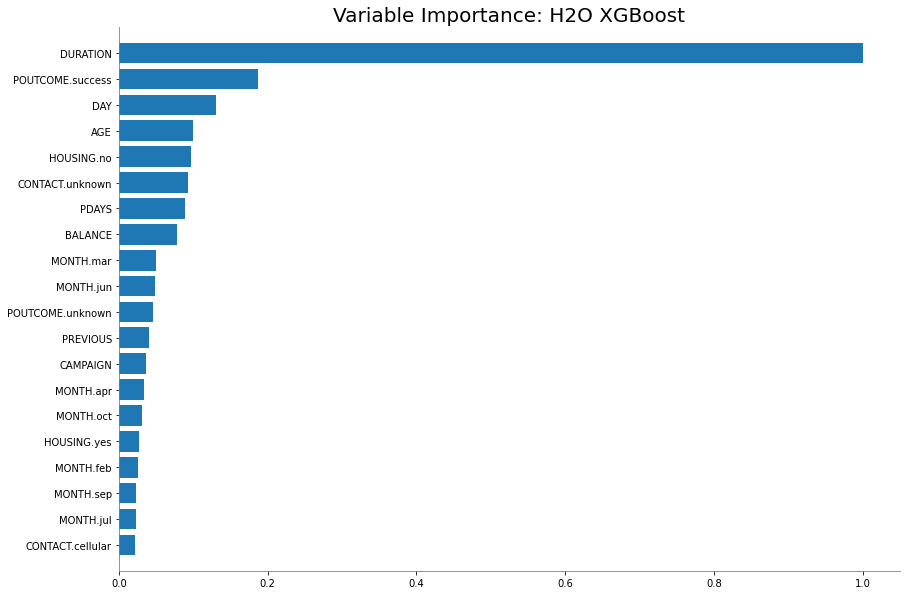

In [21]:
best_model.varimp_plot(num_of_features = 20)